In [1]:
import os
import glob
import numpy as np
import pandas as pd
import pickle
import joblib
import seaborn as sns
import networkx as nx
from graph_utils import get_graph_features
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = '../data/depression/'
folders_list = sorted(os.listdir(data_path))

In [3]:
corr_matrix_list = []

for folder in folders_list:
    df_path = data_path + folder
    corr_matrix2append = pd.read_csv(df_path, header=None).values
    corr_matrix_list.append(corr_matrix2append)

In [4]:
y = joblib.load('../data/y_d_nod.pkl')
y_all = joblib.load('../data/y_all.pkl')

In [ ]:
graph_features_list = []
y_list = []

for A, y_value in zip(corr_matrix_list, y):
    graph_features = get_graph_features(A, border_value=0.3, min_graph_size=3,
                                        max_graph_size=1000, max_number_of_edges=750)
    if graph_features is not None:
        graph_features_list.append(graph_features)
        y_list.append(y_value)

n_edges=109.0
92 111 109
n_edges=25.0
9 7 25
n_edges=49.0
19 8 49
n_edges=23.0
3 1 23
n_edges=139.0
121 174 139
n_edges=51.0
35 27 51
n_edges=350.0
334 1072 350
max_size is 1072, ignored
n_edges=46.0
30 23 46
n_edges=164.0
136 168 164
n_edges=33.0
11 4 33
n_edges=61.0
39 36 61
n_edges=105.0
86 113 105
n_edges=199.0
187 359 199


In [22]:
joblib.dump(graph_features_list, 'graph_features_list_depression')
joblib.dump(y_list, 'y_list_depression')

['y_list_depression']

In [23]:
aggregated_graph_features_list = []

for graph_features in graph_features_list:
    aggregated_graph_features_dict = {}
    for feature_name, feature_values in graph_features.items():
        aggregated_feature_name = feature_name + '_median'
        aggregated_graph_features_dict[aggregated_feature_name] = np.median(feature_values)
        
#         aggregated_feature_name = feature_name + '_mean'
#         aggregated_graph_features_dict[aggregated_feature_name] = np.mean(feature_values)
    
    aggregated_graph_features_list.append(aggregated_graph_features_dict)

In [24]:
df = pd.DataFrame(aggregated_graph_features_list)
df = df.fillna(0)

In [25]:
print(df.shape)
df.head()

(98, 32)


,AvgNodeDegree_edges_nodes_median,AvgNodeDegree_nodes_edges_median,AvgNodeDegree_triag_edges_median,AvgNodeDegree_triag_nodes_median,Betweenness_edges_nodes_median,Betweenness_nodes_edges_median,Betweenness_triag_edges_median,Betweenness_triag_nodes_median,Closeness_edges_nodes_median,Closeness_nodes_edges_median,...,GlobalEfficiency_triag_edges_median,GlobalEfficiency_triag_nodes_median,LocalEfficiency_edges_nodes_median,LocalEfficiency_nodes_edges_median,LocalEfficiency_triag_edges_median,LocalEfficiency_triag_nodes_median,n_edges_nodes_median,n_nodes_edges_median,n_triag_edges_median,n_triag_nodes_median
0,9.000000,0.0,7.000000,4.5,0.010769,0.0,0.029630,0.009386,0.480769,0.0,...,0.684722,0.323175,0.815472,0.153022,0.864795,0.906179,27.0,27.0,16.0,21.0
1,3.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.750000,0.0,...,0.000000,0.000000,0.800000,0.057265,0.000000,0.000000,5.0,5.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.390278,0.159544,0.000000,0.000000,12.0,12.0,1.0,3.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.051282,0.000000,0.000000,3.0,3.0,0.0,0.0
4,10.808333,0.0,12.461538,2.8,0.003922,0.0,0.015604,0.000569,0.336485,0.0,...,0.503221,0.099910,0.798562,0.300587,0.772393,0.662546,52.0,52.0,46.0,39.0


In [26]:
from pprint import pprint

In [28]:
# pprint(list(df.columns))

In [29]:
df.to_csv('df.csv', index=False)

In [30]:
df_with_target = df.copy()
df_with_target['target'] = y_list

In [31]:
df_corr = df_with_target.corr()

In [32]:
feature_names = df_corr.columns

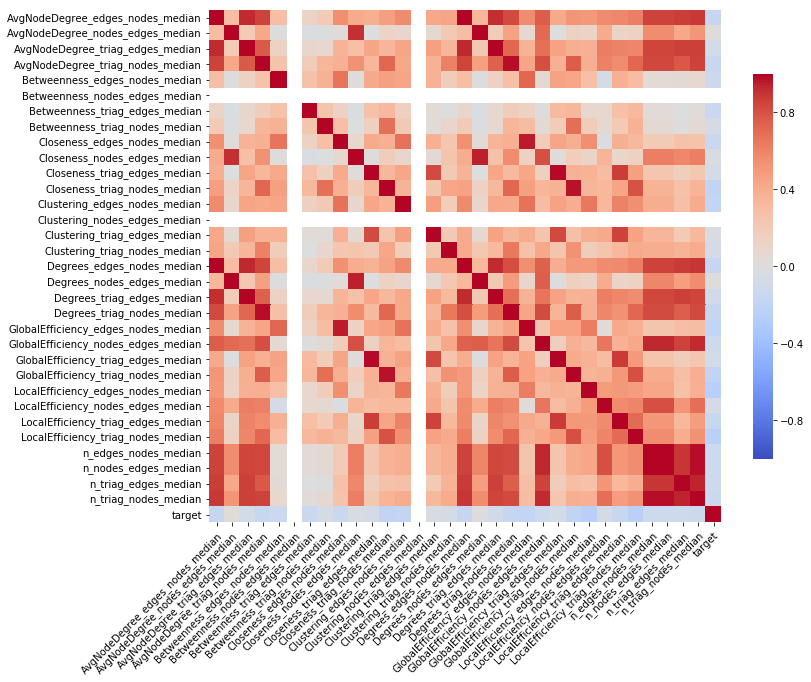

In [33]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.values, cmap='coolwarm', square=True, vmin=-1, vmax=1, cbar_kws={"shrink": .7})
# plt.xlabel(feature_names)
plt.yticks(np.arange(len(feature_names)) + 0.5, feature_names, rotation=0, va="center")
plt.xticks(np.arange(len(feature_names)) + 0.5, feature_names, rotation=45, rotation_mode="anchor", ha="right")
plt.savefig('../pic/heatmap.png')
plt.tight_layout()

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedKFold

In [35]:
target = np.array(y_list)
ss = StandardScaler()

allowed_suffixes_list = ['nodes_edges', 'edges_nodes']

columns_filtered = [column for column in df.columns if any(suffix in column for suffix in allowed_suffixes_list)]
columns_all = list(df.columns)


In [36]:
rk = RepeatedKFold(n_splits=5, n_repeats=10)

lasso = Lasso(alpha=0.01)
rf = RandomForestClassifier(n_estimators=100, max_depth=5, n_jobs=-1)
lr = LogisticRegression(solver='lbfgs', max_iter=100)
svm = SVC(gamma='scale', kernel='rbf')

methods_list = [lr, rf, svm, lasso]
# method_names = ['LR']

In [38]:
# df_list = []

results_list = []

for method in methods_list:
    method_name = method.__class__.__name__
    result = {
        'method_name': method_name,
    }

    for columns_descryption, columns_list in zip(['3-level features', '2-level features'], [columns_all, columns_filtered]):
        train_normed = ss.fit_transform(df[columns_list].values)
        scoring_method = 'roc_auc'
        method_scores = cross_val_score(lr, X=train_normed, y=target, cv=rk, scoring=scoring_method)
        method_score_mean = method_scores.mean()
        method_score_std = method_scores.std()
        result4columns = {
            f'{columns_descryption}_mean': method_score_mean,
            f'{columns_descryption}_std': method_score_std,
        }
        result.update(result4columns)

    results_list.append(result)#, name=method_name))

df_results = pd.DataFrame(results_list)
# df_list.append(df_results)
        

In [39]:
column_order = ['method_name', '2-level features_mean', '3-level features_mean', '2-level features_std', '3-level features_std']
df_results[column_order].round(3)

,method_name,2-level features_mean,3-level features_mean,2-level features_std,3-level features_std
0,LogisticRegression,0.544,0.495,0.107,0.116
1,RandomForestClassifier,0.527,0.461,0.131,0.146
2,SVC,0.531,0.472,0.123,0.141
3,Lasso,0.514,0.479,0.114,0.111
